# Import libraries to be used for this project

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt

<H2>Analyze the following</H2><br>
are customers using branded terms to search for aircon information?<br><br>
or are they using more non branded or generic terms? to search for aircon information<br><br>
what is the SV trend for aircon solutions in general?<br><br>
what are the top keywords based on the trend? or based on peaked period?<br><br>
which websites are ranking in SERP and what type of content providers, retailers or brand websites use?<br><br>
is there a unique search pattern when users looking for residential aircon products? or industrial air con solutions?

# Data_categorization

In [3]:
daikin_kws.shape

(48960, 6)

In [5]:
daikin_kws['Category'] = pd.np.where(daikin_kws.Keyword.str.contains("daikin"), "brand_kws","non_brand")

<ipython-input-5-52caca110d91>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  daikin_kws['Category'] = pd.np.where(daikin_kws.Keyword.str.contains("daikin"), "brand_kws","non_brand")


In [6]:
daikin_kws.head(3)

,Keyword,Dates,SV,,Month,Year,Category
0,daikin aircon,Jan-22,1900,,1,2022,brand_kws
1,daikin air conditioners,Jan-22,590,,1,2022,brand_kws
2,daikin ac,Jan-22,590,,1,2022,brand_kws


# Brand and Non Brand KWs count

In [43]:
split = daikin_kws.groupby(["Category"]).agg({"Keyword":"count","SV":"sum"})
split.head()

,Keyword,SV
Category,,
brand_kws,16584,375380
non_brand,32376,3187850


<h1>Air Solutions category analysis</h1>
<br>Online users still use Non-brand keywords over brand keywords<br>
<br>Non-brand keywords SV is significantly higher compare to brand keywords<br>
<br>There are three peak periods for Air Solutions SV, May (peaked period), July in 2022 and October in 2023<br>

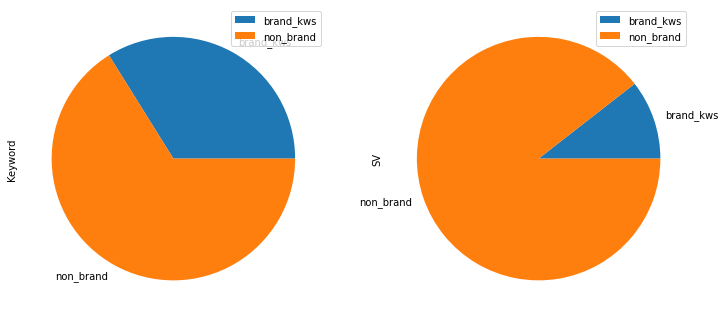

In [52]:
plot = split.plot.pie(subplots=True, figsize=(12, 6))

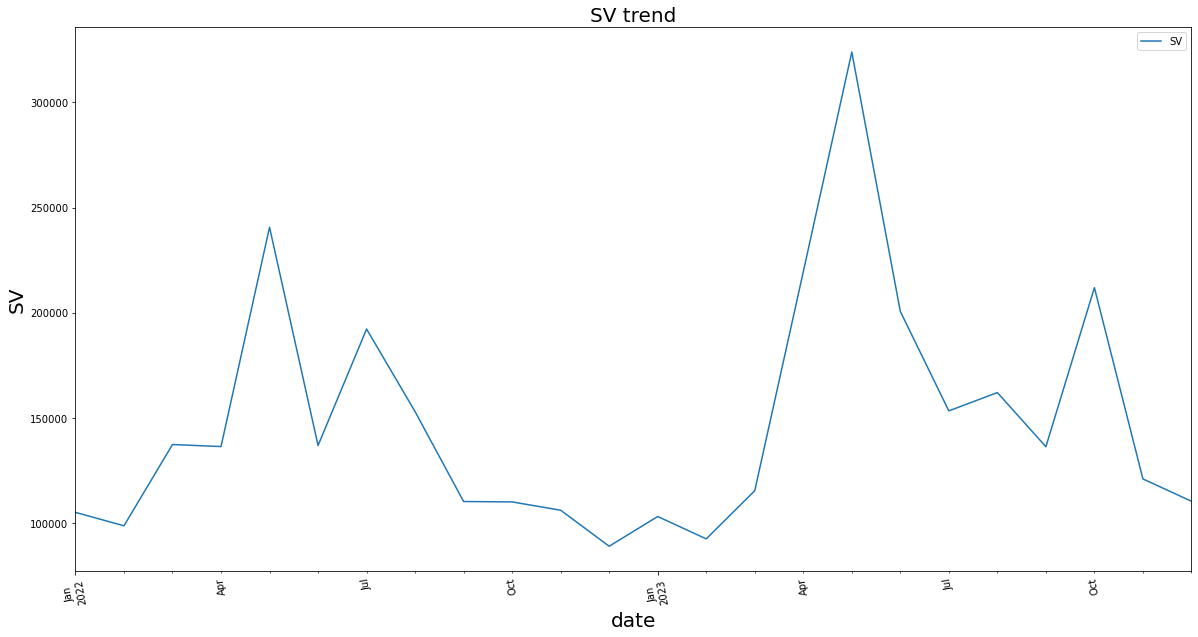

In [51]:
##enter category##
##category = daikin_kws[daikin_kws['chillers'] == "chillers"]
trendline = daikin_kws
trendline = trendline.groupby(["Year","Month"]).agg({"Keyword":"count","SV":"sum"})
trendline = trendline.reset_index()

trendline['date'] = pd.to_datetime(trendline[['Year', 'Month']].assign(DAY=1))
trendline = trendline.drop(['Year', 'Month', 'Keyword'], axis=1)
trendline = trendline.set_index('date')
trendline = trendline.sort_index()

trendline.plot(rot = 100)
plt.xlabel("date", size = 20)
plt.ylabel("SV", size = 20)
plt.title("SV trend", size = 20)
plt.rcParams["figure.figsize"] = (20, 10)

# What are the top KWs with high SV in May 2022?

In [60]:
rslt_df = daikin_kws[(daikin_kws['Month'] == 5) & (daikin_kws['Year'] == 2022)] 
rslt_df = rslt_df.sort_values(['SV'], ascending=False)
rslt_df.head(10)

,Keyword,Dates,SV,,Month,Year,Category
8264,air con portable,May-22,14800,,5,2022,non_brand
8841,aircon portable air conditioner,May-22,14800,,5,2022,non_brand
8201,portable air con,May-22,14800,,5,2022,non_brand
8192,portable aircon,May-22,14800,,5,2022,non_brand
10141,portable air conditioner air conditioner,May-22,14800,,5,2022,non_brand
10171,portable ac s,May-22,14800,,5,2022,non_brand
8984,portable aircon sg,May-22,5400,,5,2022,non_brand
8631,portable ac singapore,May-22,5400,,5,2022,non_brand
8365,portable air conditioner singapore,May-22,5400,,5,2022,non_brand
8194,portable aircon singapore,May-22,5400,,5,2022,non_brand


# What are the top KWs with high SV in May 2023?

In [61]:
rslt_df = daikin_kws[(daikin_kws['Month'] == 5) & (daikin_kws['Year'] == 2023)] 
rslt_df = rslt_df.sort_values(['SV'], ascending=False)
rslt_df.head(10)

,Keyword,Dates,SV,,Month,Year,Category
34621,portable air conditioner air conditioner,May-23,22200,,5,2023,non_brand
33321,aircon portable air conditioner,May-23,22200,,5,2023,non_brand
32672,portable aircon,May-23,22200,,5,2023,non_brand
32744,air con portable,May-23,22200,,5,2023,non_brand
34651,portable ac s,May-23,22200,,5,2023,non_brand
32681,portable air con,May-23,22200,,5,2023,non_brand
33111,portable ac singapore,May-23,8100,,5,2023,non_brand
32674,portable aircon singapore,May-23,8100,,5,2023,non_brand
32845,portable air conditioner singapore,May-23,8100,,5,2023,non_brand
33464,portable aircon sg,May-23,8100,,5,2023,non_brand


# What are the top KWs with high SV in July 2022?

In [63]:
rslt_df = daikin_kws[(daikin_kws['Month'] == 7) & (daikin_kws['Year'] == 2022)] 
rslt_df = rslt_df.sort_values(['SV'], ascending=False)
rslt_df.head(10)

,Keyword,Dates,SV,,Month,Year,Category
14251,portable ac s,Jul-22,12100,,7,2022,non_brand
12344,air con portable,Jul-22,12100,,7,2022,non_brand
12281,portable air con,Jul-22,12100,,7,2022,non_brand
14221,portable air conditioner air conditioner,Jul-22,12100,,7,2022,non_brand
12272,portable aircon,Jul-22,12100,,7,2022,non_brand
12921,aircon portable air conditioner,Jul-22,12100,,7,2022,non_brand
12445,portable air conditioner singapore,Jul-22,3600,,7,2022,non_brand
12297,air conditioner,Jul-22,3600,,7,2022,non_brand
12274,portable aircon singapore,Jul-22,3600,,7,2022,non_brand
13064,portable aircon sg,Jul-22,3600,,7,2022,non_brand


# What are the top KWs with high SV in Oct 2023?

In [64]:
rslt_df = daikin_kws[(daikin_kws['Month'] == 10) & (daikin_kws['Year'] == 2023)] 
rslt_df = rslt_df.sort_values(['SV'], ascending=False)
rslt_df.head(10)

,Keyword,Dates,SV,,Month,Year,Category
44821,portable air conditioner air conditioner,Oct-23,12100,,10,2023,non_brand
44851,portable ac s,Oct-23,12100,,10,2023,non_brand
42872,portable aircon,Oct-23,12100,,10,2023,non_brand
42944,air con portable,Oct-23,12100,,10,2023,non_brand
43521,aircon portable air conditioner,Oct-23,12100,,10,2023,non_brand
42881,portable air con,Oct-23,12100,,10,2023,non_brand
44871,ac conditions,Oct-23,8100,,10,2023,non_brand
44670,aircon conditioning,Oct-23,8100,,10,2023,non_brand
42874,portable aircon singapore,Oct-23,4400,,10,2023,non_brand
43045,portable air conditioner singapore,Oct-23,4400,,10,2023,non_brand


# Most of the websites within top 3 of SERP are ecommerce retailers sites particularly 
<br>Harveynorman.com.sg
<br>Gaincity.com
<br>Megadiscountstore.com

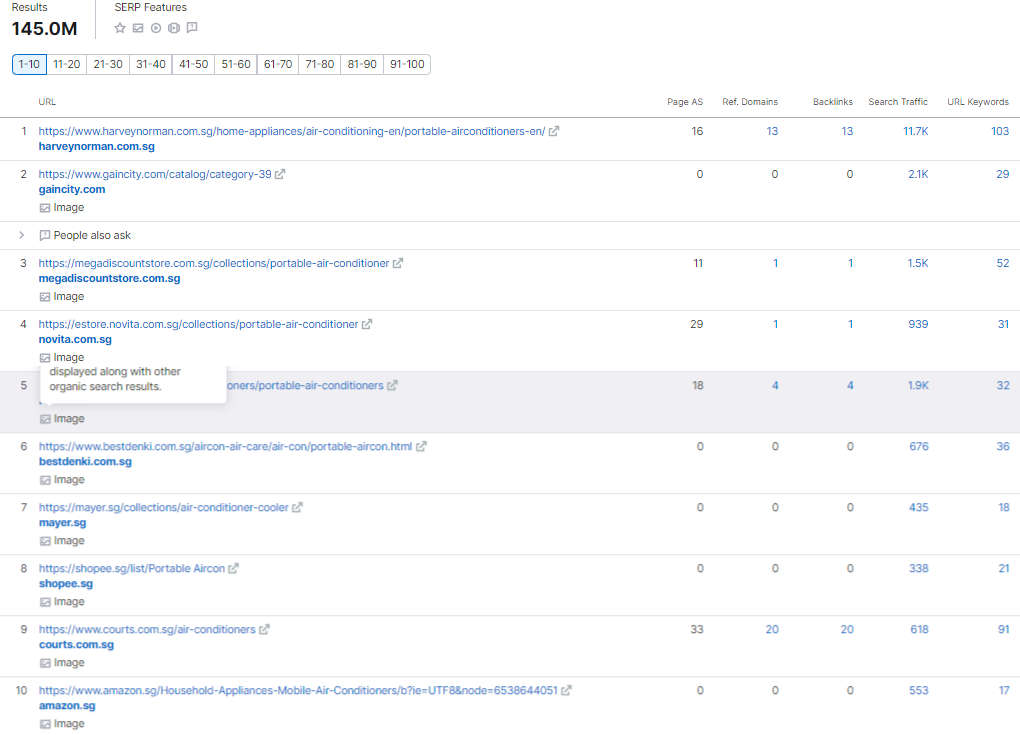

In [76]:
from IPython import display
display.Image("imagepath1.png", height="100")

# Their landing pages format are Product Finder pages

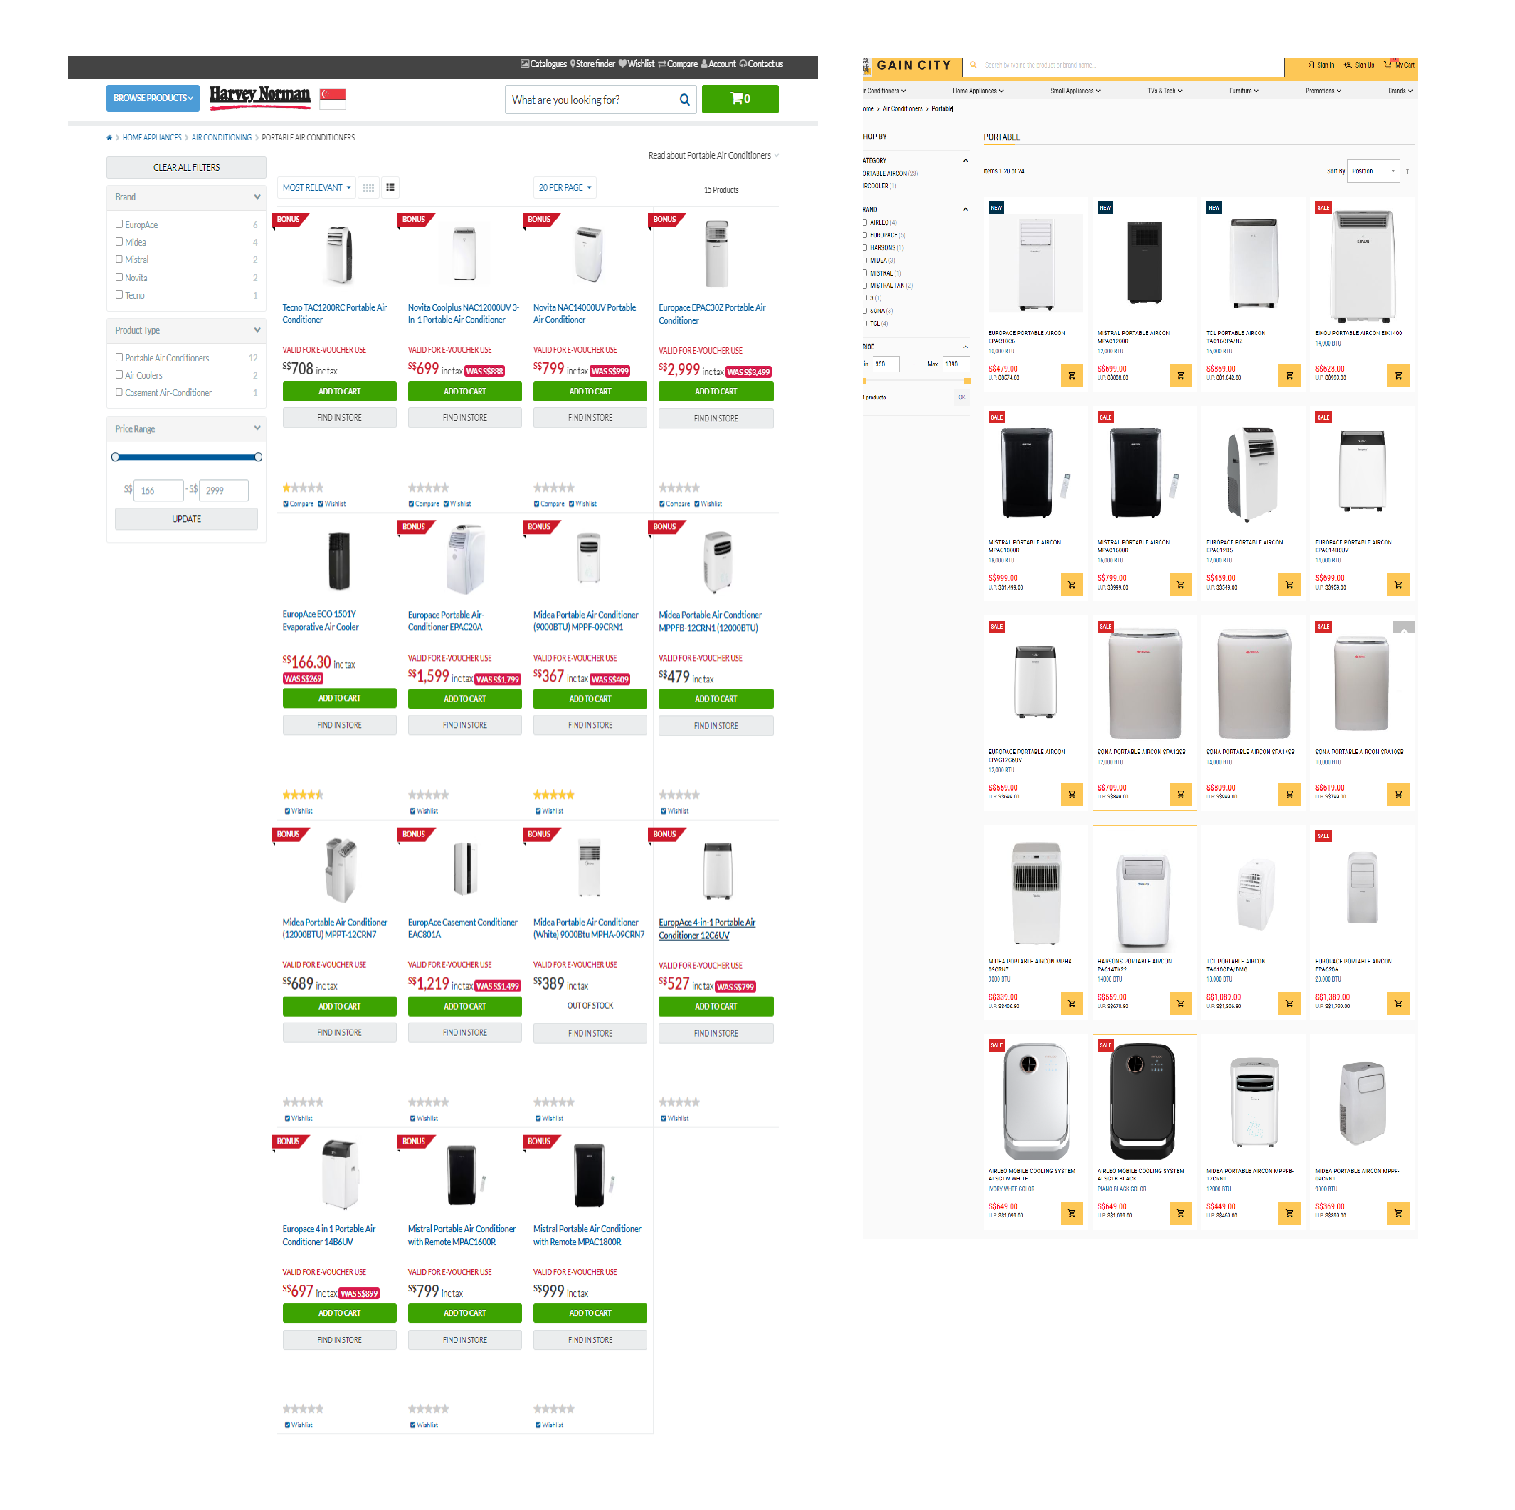

In [77]:
from IPython import display
display.Image("imagepath2.png", width="800", height="200")

# Aircon for industries, offices and retails

In [103]:
daikin_kws['commercial_category'] = pd.np.where(daikin_kws.Keyword.str.contains("commercial"), "yes",
                                    pd.np.where(daikin_kws.Keyword.str.contains("industrial"), "yes",
                                    pd.np.where(daikin_kws.Keyword.str.contains("vrv"), "yes",
                                    pd.np.where(daikin_kws.Keyword.str.contains("ducted"), "yes", "no"))))
daikin_kws.head(2)

<ipython-input-103-ddc4265ead5e>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  daikin_kws['commercial_category'] = pd.np.where(daikin_kws.Keyword.str.contains("commercial"), "yes",
<ipython-input-103-ddc4265ead5e>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(daikin_kws.Keyword.str.contains("industrial"), "yes",
<ipython-input-103-ddc4265ead5e>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(daikin_kws.Keyword.str.contains("vrv"), "yes",
<ipython-input-103-ddc4265ead5e>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(daikin_kws.Keyword.str.contains("ducted"), "yes", "no"))))


,Keyword,Dates,SV,,Month,Year,Category,commercial_category
0,daikin aircon,Jan-22,1900,,1,2022,brand_kws,no
1,daikin air conditioners,Jan-22,590,,1,2022,brand_kws,no


In [104]:
daikin_commercial_kws = daikin_kws[(daikin_kws['commercial_category'] == "yes")] 
daikin_commercial_kws.shape

(7080, 8)

In [105]:
daikin_commercial_kws.head()

,Keyword,Dates,SV,,Month,Year,Category,commercial_category
3,daikin ducted air conditioning,Jan-22,40,,1,2022,brand_kws,yes
8,daikin ducted aircon,Jan-22,10,,1,2022,brand_kws,yes
12,ducted air conditioning,Jan-22,720,,1,2022,non_brand,yes
16,ducted aircon,Jan-22,720,,1,2022,non_brand,yes
23,daikin ducted,Jan-22,10,,1,2022,brand_kws,yes


In [106]:
commercial_split = daikin_commercial_kws.groupby(["Category"]).agg({"Keyword":"count","SV":"sum"})
commercial_split.head()

,Keyword,SV
Category,,
brand_kws,2280,59130
non_brand,4800,171290


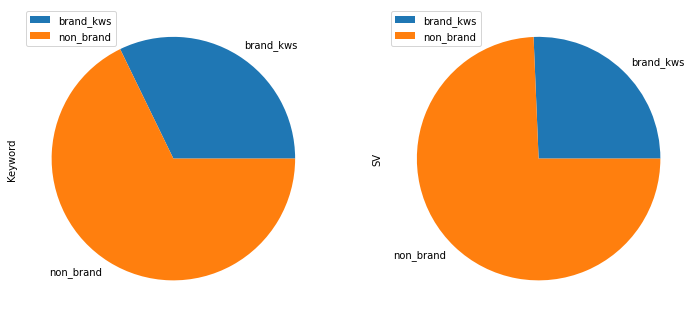

In [107]:
plot = commercial_split.plot.pie(subplots=True, figsize=(12, 6))

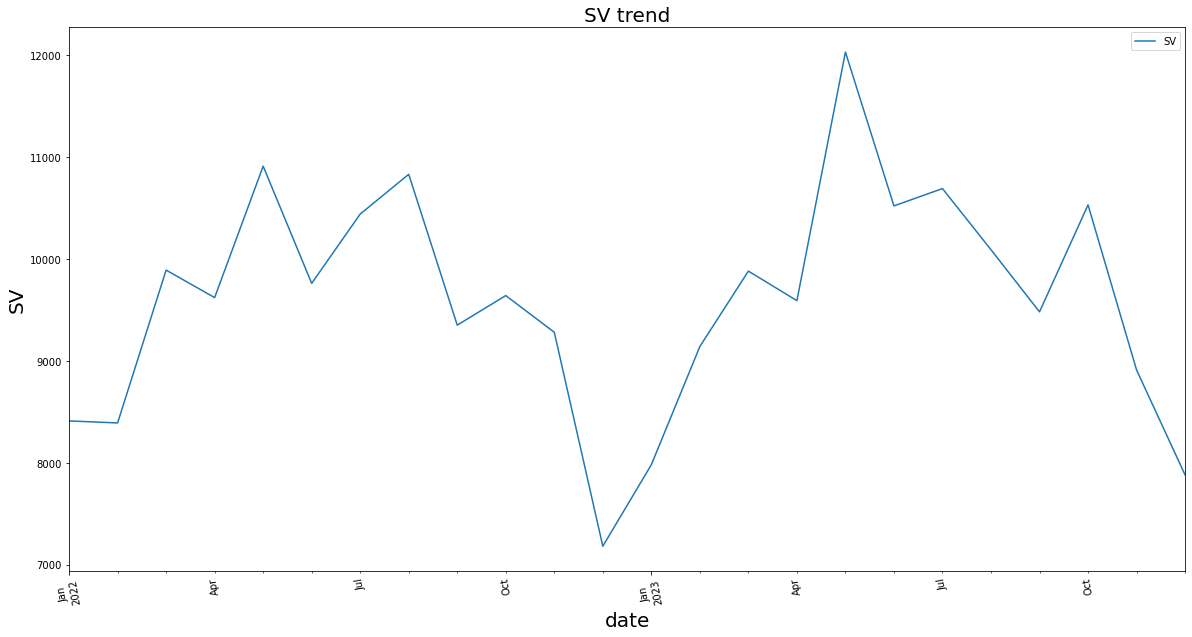

In [108]:
##enter category##
##category = daikin_kws[daikin_kws['chillers'] == "chillers"]
trendline = daikin_commercial_kws
trendline = trendline.groupby(["Year","Month"]).agg({"Keyword":"count","SV":"sum"})
trendline = trendline.reset_index()

trendline['date'] = pd.to_datetime(trendline[['Year', 'Month']].assign(DAY=1))
trendline = trendline.drop(['Year', 'Month', 'Keyword'], axis=1)
trendline = trendline.set_index('date')
trendline = trendline.sort_index()

trendline.plot(rot = 100)
plt.xlabel("date", size = 20)
plt.ylabel("SV", size = 20)
plt.title("SV trend", size = 20)
plt.rcParams["figure.figsize"] = (20, 10)

In [109]:
rslt_df = daikin_commercial_kws[(daikin_commercial_kws['Month'] == 5) & (daikin_kws['Year'] == 2022)] 
rslt_df = rslt_df.sort_values(['SV'], ascending=False)
rslt_df.head(10)

<ipython-input-109-5a28f89d8ed1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rslt_df = daikin_commercial_kws[(daikin_commercial_kws['Month'] == 5) & (daikin_kws['Year'] == 2022)]


,Keyword,Dates,SV,,Month,Year,Category,commercial_category
9035,daikin industrial ac,May-22,1000,,5,2022,brand_kws,yes
8625,daikin industrial air conditioner,May-22,1000,,5,2022,brand_kws,yes
8172,ducted air conditioning,May-22,880,,5,2022,non_brand,yes
8176,ducted aircon,May-22,880,,5,2022,non_brand,yes
8620,aircon ducted,May-22,880,,5,2022,non_brand,yes
8301,vrv system,May-22,480,,5,2022,non_brand,yes
8480,vrv ac,May-22,320,,5,2022,non_brand,yes
9765,air con vrv,May-22,320,,5,2022,non_brand,yes
9351,air ducted,May-22,320,,5,2022,non_brand,yes
9759,vrv air cond,May-22,320,,5,2022,non_brand,yes


In [110]:
rslt_df = daikin_commercial_kws[(daikin_commercial_kws['Month'] == 5) & (daikin_kws['Year'] == 2023)] 
rslt_df = rslt_df.sort_values(['SV'], ascending=False)
rslt_df.head(10)

<ipython-input-110-7391be467355>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rslt_df = daikin_commercial_kws[(daikin_commercial_kws['Month'] == 5) & (daikin_kws['Year'] == 2023)]


,Keyword,Dates,SV,,Month,Year,Category,commercial_category
33105,daikin industrial air conditioner,May-23,1000,,5,2023,brand_kws,yes
32652,ducted air conditioning,May-23,1000,,5,2023,non_brand,yes
32656,ducted aircon,May-23,1000,,5,2023,non_brand,yes
33100,aircon ducted,May-23,1000,,5,2023,non_brand,yes
33515,daikin industrial ac,May-23,1000,,5,2023,brand_kws,yes
32781,vrv system,May-23,590,,5,2023,non_brand,yes
34239,vrv air cond,May-23,320,,5,2023,non_brand,yes
32849,vrv air conditioning,May-23,320,,5,2023,non_brand,yes
34245,air con vrv,May-23,320,,5,2023,non_brand,yes
33447,vrv ac unit,May-23,320,,5,2023,non_brand,yes


# Most of the websites within top 3 of SERP for "ducted airconditioning" keywords are either "manufacturers", "retailers" or "service provider for repairs or maintenance"
<br>daikin.com
<br>coolserve.com
<br>weiweiaircon.com.sg

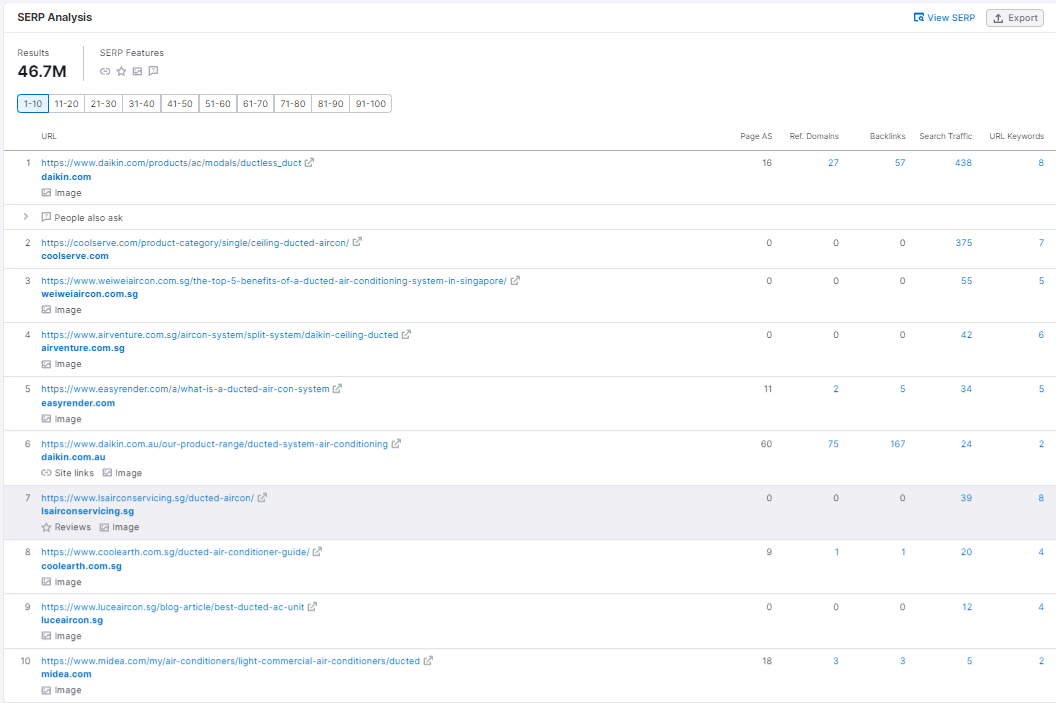

In [111]:
from IPython import display
display.Image("imagepath3.png", height="100")

# Daikin landing page for KW ducted aircondition is a information content Google Rank 1

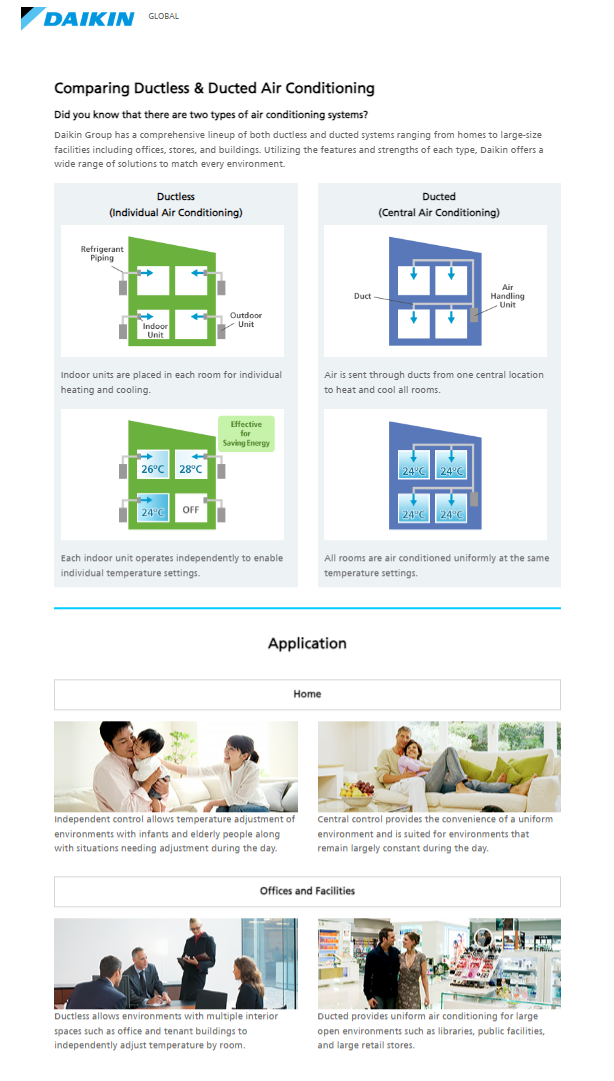

In [99]:
display.Image("imagepath4.png", width="500")

# Coolserve.com landing page for KW ducted aircondition is a product catalog content Google Rank 2

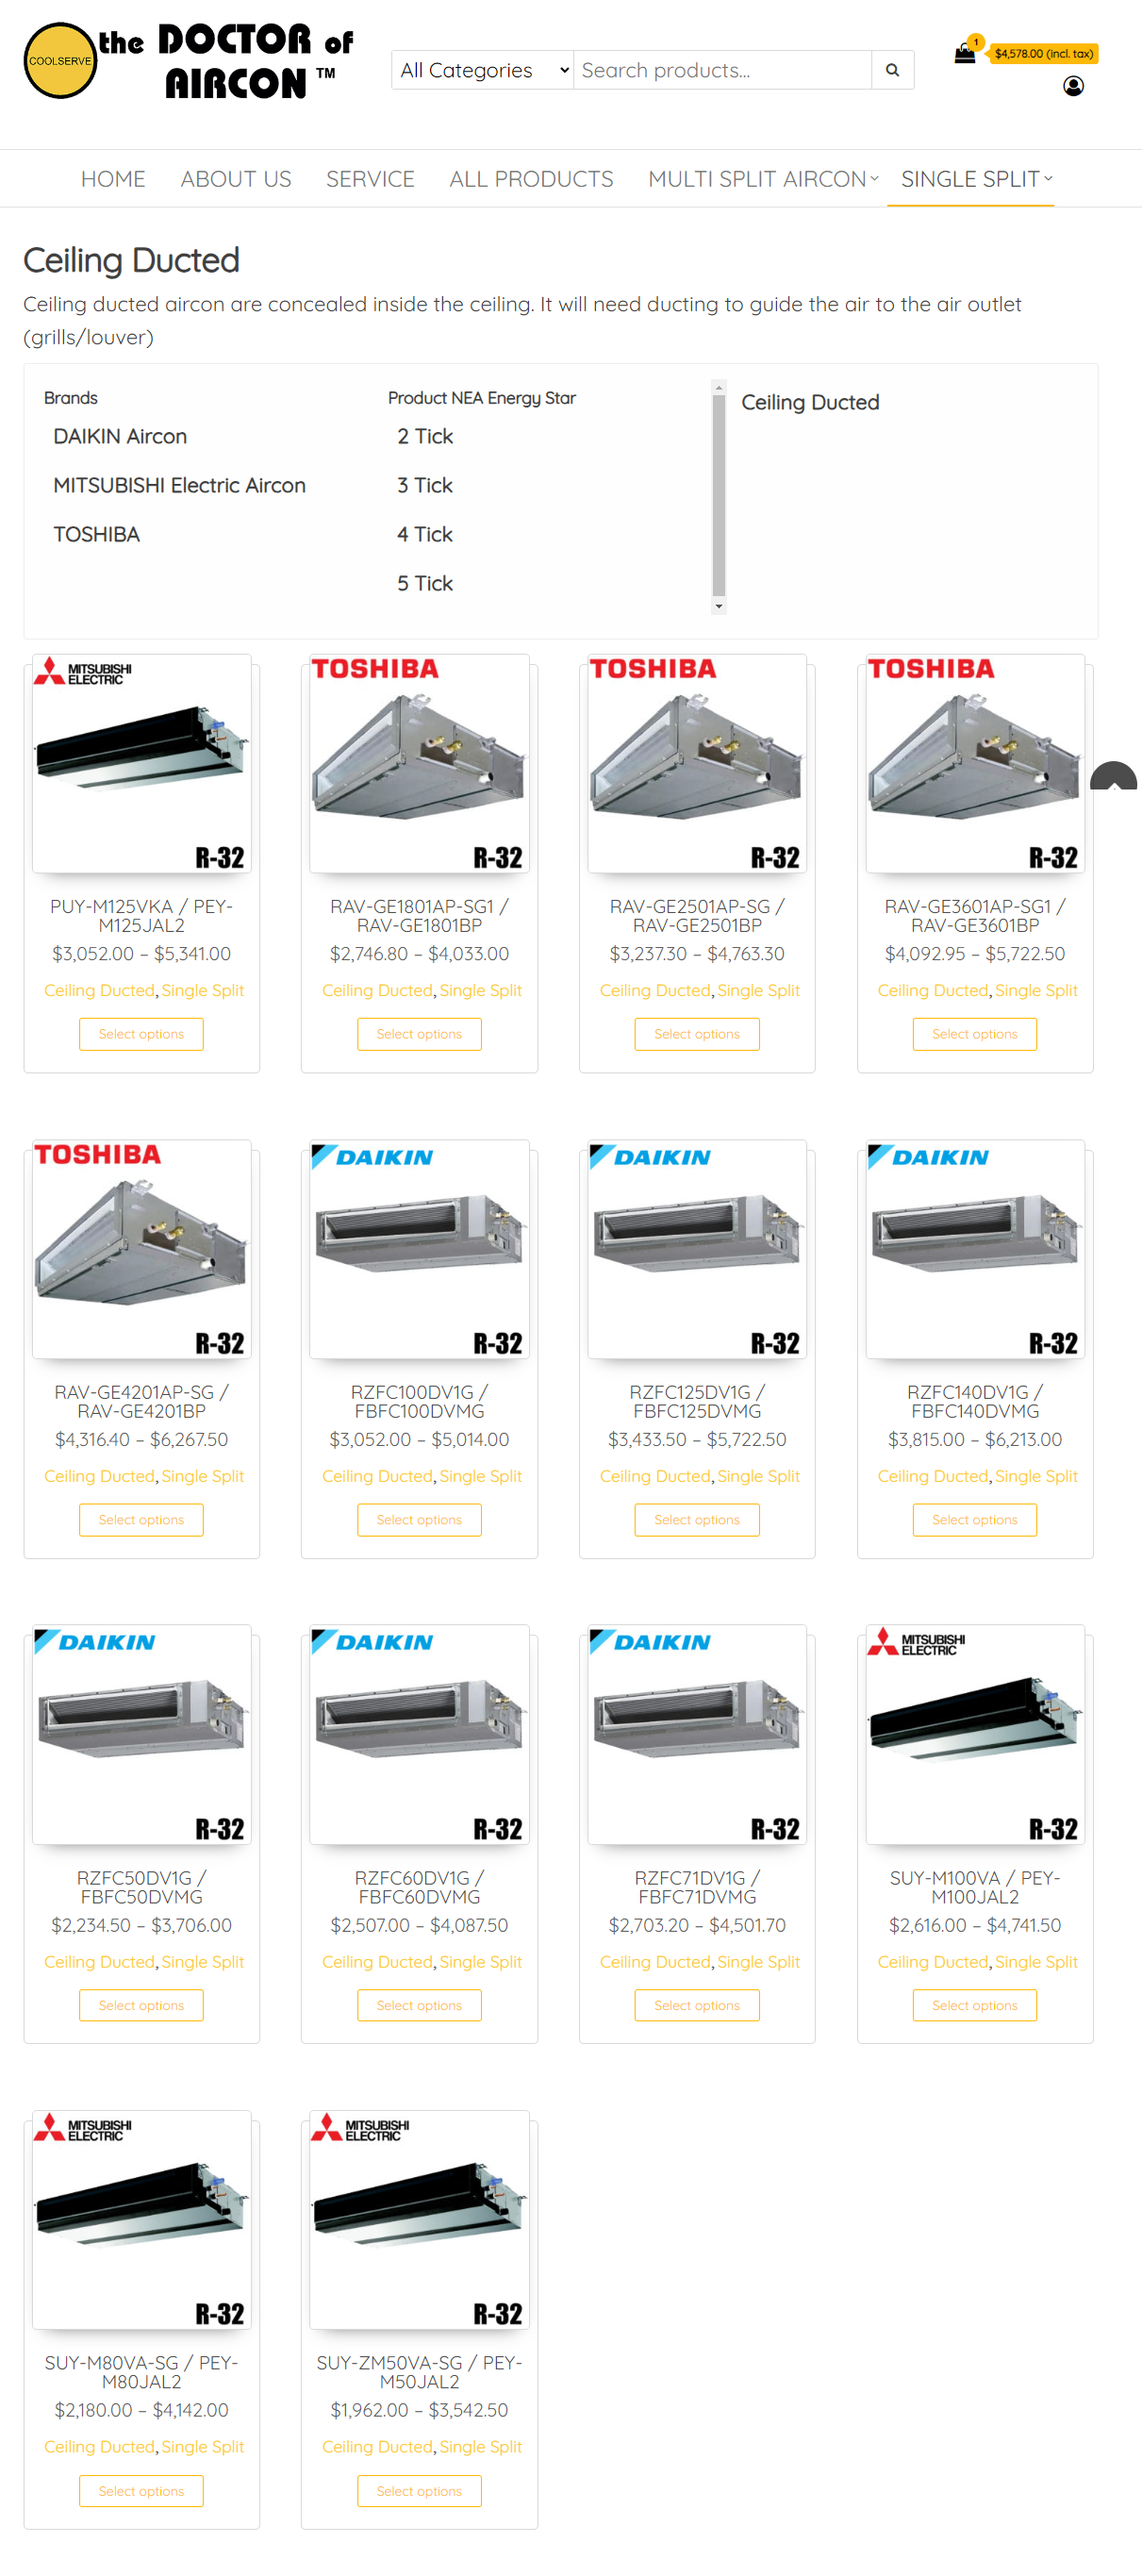

In [100]:
display.Image("imagepath5.png", width="500")

# weiweiaircon.com.sg landing page for KW ducted aircondition is a an article content content Google Rank 3

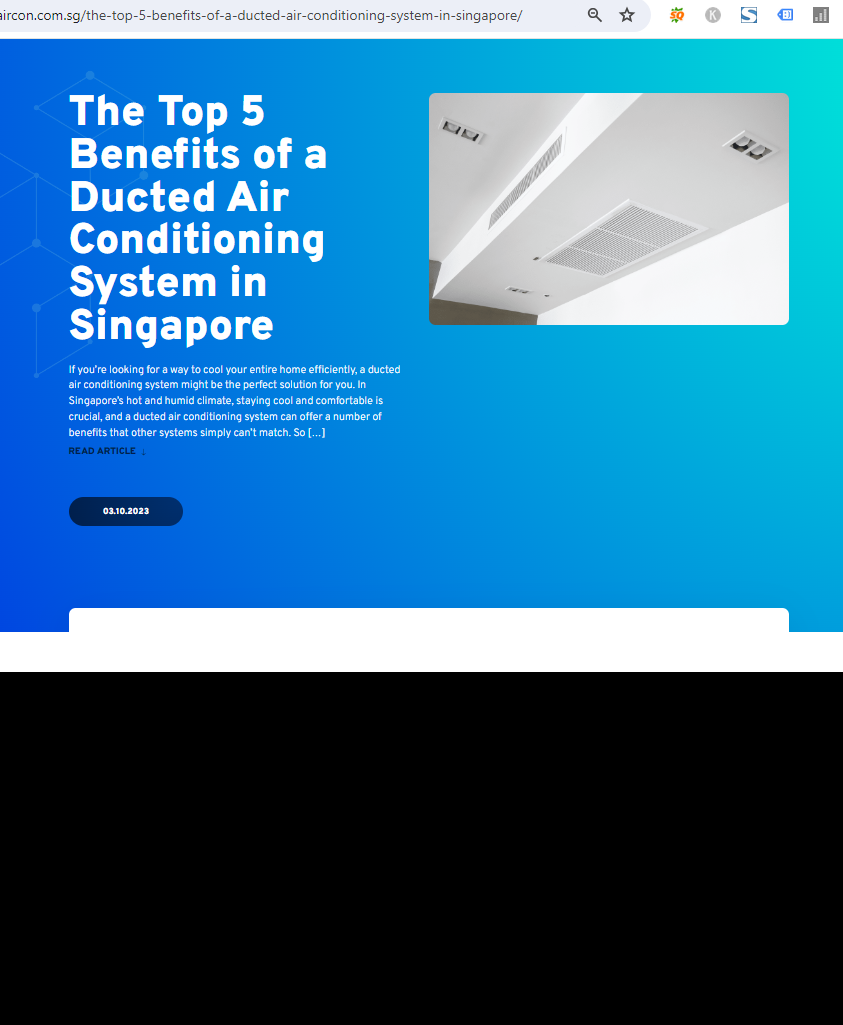

In [101]:
display.Image("imagepath6.png", width="500")

<H2>Analyze the following</H2><br>
are customers using branded terms to search for aircon information?<br><br>
are they using more non branded or generic terms? to search for aircon information<br><br>
what is the SV trend for aircon solutions in general?<br><br>
what are the top keywords based on the trend? or based on peaked period?<br><br>
which websites are ranking in SERP and what type of content providers, retailers or brand websites use?<br><br>
is there a unique search pattern when users looking for residential aircon products? or industrial air con solutions?